In [1]:
import os
import pandas as pd
import numpy as np
from pydataset import data
import requests
from env import username, host, password

# modules
import env
import acquire as a
import prepare as p
import wrangle as w

#visual imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Store

In [2]:
df = a.acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [3]:
# Deep copy of original df
df2 = df.copy()

In [4]:
# prep df
df = p.prep_sales(df)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,total_sales
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,1,1,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,12018 Perrin Beitel Rd,78217,1,1,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,1,1,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,15000 San Pedro Ave,78232,1,1,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,735 SW Military Dr,78221,1,1,294.00


In [5]:
df.shape

(913000, 9)

In [6]:
df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [7]:
# Create year, month, day of week columns
df['year'] = df.index.year
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()
df['day_of_week'] = df.index.day_of_week
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,total_sales,year,day
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,1,10.92,2013,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,12018 Perrin Beitel Rd,78217,January,1,218.40,2013,Tuesday
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,1,125.55,2013,Tuesday
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,15000 San Pedro Ave,78232,January,1,453.60,2013,Tuesday
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,735 SW Military Dr,78221,January,1,294.00,2013,Tuesday


In [8]:
# Deep Copy of df
df2 = df.copy()

## Split Data

**Percent-Based Split (55/25/20)**

In [9]:
train_len = int(0.55 * len(df))
val_test_split = int(0.8 * len(df))
train_len, val_test_split

(502150, 730400)

In [10]:
# Train set. Everything up to train_len
train = df.iloc[:train_len]

# Val set. Everything between train_len & val_test_split
val = df.iloc[train_len:val_test_split]

# Test set. Everything after val_test_split
test = df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((502150, 11), (228250, 11), (182600, 11))

## Explore and Visualize

In [11]:
# no nulls
df.isna().sum()

sale_amount      0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
month            0
day_of_week      0
total_sales      0
year             0
day              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  int64  
 1   item_brand     913000 non-null  object 
 2   item_name      913000 non-null  object 
 3   item_price     913000 non-null  float64
 4   store_address  913000 non-null  object 
 5   store_zipcode  913000 non-null  int64  
 6   month          913000 non-null  object 
 7   day_of_week    913000 non-null  int64  
 8   total_sales    913000 non-null  float64
 9   year           913000 non-null  int64  
 10  day            913000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.6+ MB


In [13]:
# 49 brands
train.item_brand.nunique()

49

In [14]:
# Sum of values for each item of a brand.
train.groupby(['item_brand','item_name']).sum()

,,sale_amount,item_price,store_zipcode,day_of_week,total_sales,year
item_brand,item_name,,,,,,
Ahold,Ahold Cocoa Almonds,683410,31833.14,785533441,30098,2166409.70,20223680
Amys,Amys Light & Lean Spaghetti Italiano,272763,6027.00,785768064,30110,163657.80,20229725
Back To Nature,Back To Nature Gluten Free White Cheddar Rice Thin Crackers,170953,26212.23,785611682,30102,446187.33,20225695
Barefoot,Barefoot Pinot Grigio 187,411280,6828.56,785533496,30098,279670.40,20223680
Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,205458,74124.72,785689911,30106,1516280.04,20227710
Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk,752750,73392.40,785376992,30090,5502602.50,20219650
Boars Head,Boars Head Sliced White American Cheese - 120 Ct,206512,31538.16,785689866,30106,648447.68,20227710
Burts Bees,Burts Bees Daily Moisturizing Cream Sensitive,239916,51922.31,785611628,30102,1240365.72,20225695
Careone,Careone Family Comb Set - 8 Ct,376858,7431.82,785611667,30102,278874.92,20225695


In [15]:
# Sum of values for each brand. Sorted by total_sales
train.groupby(['item_brand']).sum().sort_values('total_sales', ascending=False)

,sale_amount,item_price,store_zipcode,day_of_week,total_sales,year
item_brand,,,,,,
Usda Produce,1266233,131965.02,1571223337,60204,8678147.26,40451390
Suave,823384,91500.84,785689927,30106,7501028.24,20227710
Deerfields Gluten Free,719804,79825.95,785455224,30094,5722441.80,20221665
Heinz,650492,86863.30,785533428,30098,5626755.80,20223680
Betty Crocker,752750,73392.40,785376992,30090,5502602.50,20219650
Mueller,651154,84344.40,785455193,30094,5469693.60,20221665
Twinings Of London,547459,96814.52,785611697,30102,5277504.76,20225695
Garnier Nutritioniste,787049,64978.21,785611662,30102,5092207.03,20225695
The First Years,650676,65493.40,785768101,30110,4242407.52,20229725


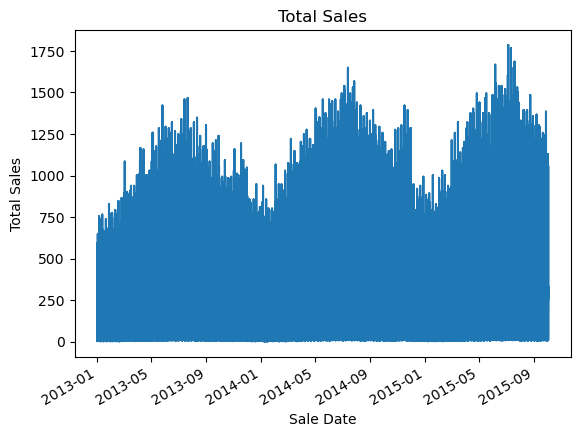

In [16]:
train.total_sales.plot()
plt.ylabel('Total Sales')
plt.xlabel('Sale Date')
plt.title('Total Sales')
plt.show()

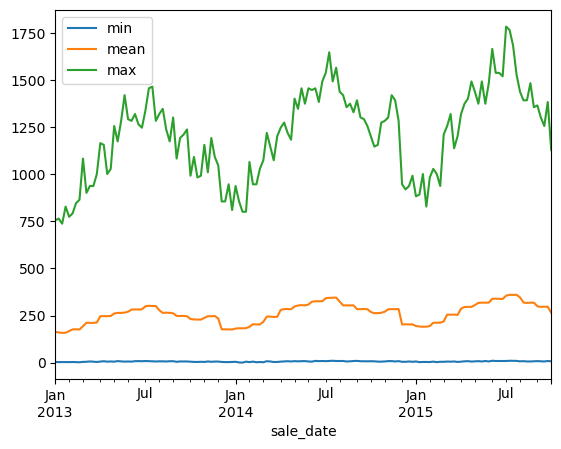

In [17]:
train.resample('W').min().total_sales.plot(label='min')
train.resample('W').mean().total_sales.plot(label='mean')
train.resample('W').max().total_sales.plot(label='max')
plt.legend()

In [18]:
# Top 10 selling brands
top10 = train.groupby(['item_brand']).sum().sort_values('total_sales', ascending=False).head(10)
top10.head()

,sale_amount,item_price,store_zipcode,day_of_week,total_sales,year
item_brand,,,,,,
Usda Produce,1266233,131965.02,1571223337,60204,8678147.26,40451390
Suave,823384,91500.84,785689927,30106,7501028.24,20227710
Deerfields Gluten Free,719804,79825.95,785455224,30094,5722441.80,20221665
Heinz,650492,86863.30,785533428,30098,5626755.80,20223680
Betty Crocker,752750,73392.40,785376992,30090,5502602.50,20219650


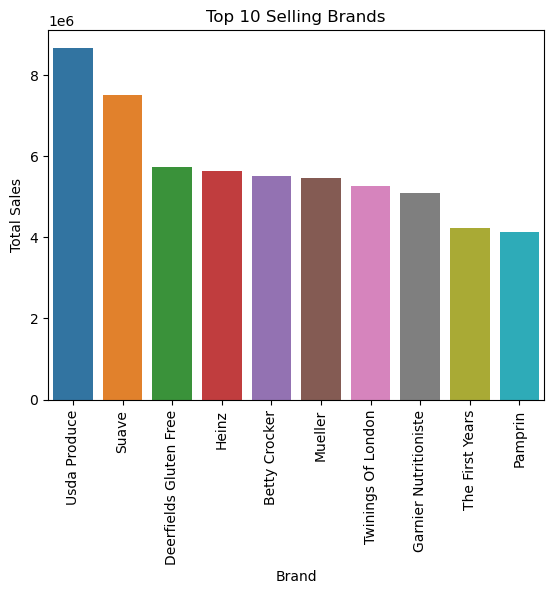

In [19]:
sns.barplot(x=top10.index, y='total_sales', data=top10)
plt.ylabel('Total Sales')
plt.xlabel('Brand')
plt.title('Top 10 Selling Brands')
plt.xticks(rotation='vertical')
plt.show()

Text(0, 0.5, 'Total Sales next Month')

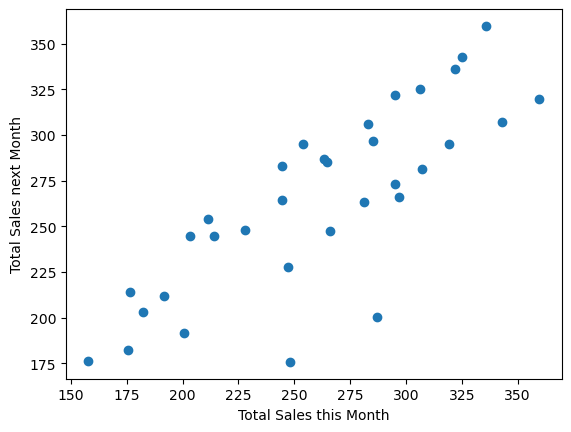

In [20]:
plt.scatter(train.total_sales.resample('M').mean(), train.total_sales.resample('M').mean().shift(-1))
plt.xlabel('Total Sales this Month')
plt.ylabel('Total Sales next Month')

# OPS data

In [22]:
ops = a.get_ops()
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
